<a href="https://colab.research.google.com/github/Gitfarheen/Deep-Learning/blob/main/Lab10_TFlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

# Create a simple CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
x_train = x_train[..., np.newaxis]  # Add channel dimension
x_test = x_test[..., np.newaxis]

# Compile and train the model briefly
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

# Convert the trained model to TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enable default quantization

# Convert the model
quantized_model = converter.convert()

# Save the quantized model
with open("quantized_model.tflite", "wb") as f:
    f.write(quantized_model)

print("Quantized model has been saved as 'quantized_model.tflite'")

# Optional: Load and test the quantized model for inference
interpreter = tf.lite.Interpreter(model_path="quantized_model.tflite")
interpreter.allocate_tensors()




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8676 - loss: 0.4416 - val_accuracy: 0.9771 - val_loss: 0.0719
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0777 - val_accuracy: 0.9816 - val_loss: 0.0551
Saved artifact at '/tmp/tmp_fa7q3s_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  133184837496400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133184837497280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133184837497808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133184835504960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133184835502672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133184835506720: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized model has been saved as 'qua

Quantized model output: [[8.5564862e-09 3.2841899e-10 1.1957343e-06 4.1068023e-07 1.4408732e-12
  4.5173340e-10 1.7940450e-15 9.9999630e-01 7.8194722e-09 2.0949335e-06]]
Predicted class: 7
Maximum value (confidence): 0.9999963


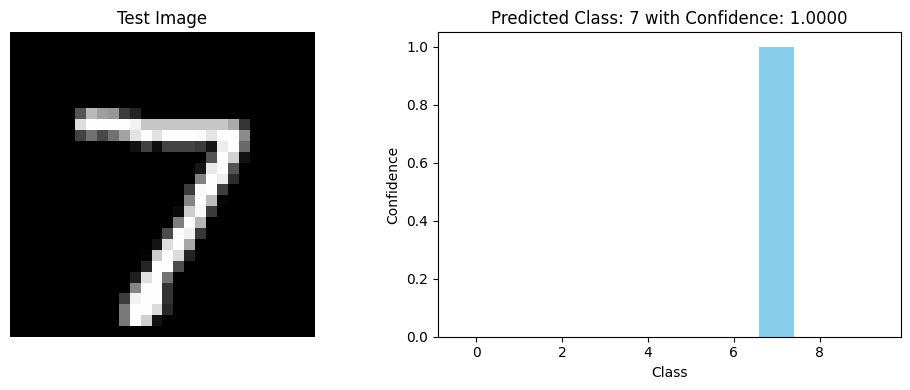

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Get input and output details from the interpreter
input_details = interpreter.get_input_details() # Get input tensor details
output_details = interpreter.get_output_details() # Get output tensor details


# Ensure the input sample is in FLOAT32 format
sample_input = x_test[0:1].astype(np.float32)  # Take one sample and convert to FLOAT32
interpreter.set_tensor(input_details[0]['index'], sample_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Find the maximum value in the model output and its index (predicted class)
max_value = np.max(output_data)
predicted_class = np.argmax(output_data)

print("Quantized model output:", output_data)
print("Predicted class:", predicted_class)
print("Maximum value (confidence):", max_value)

# Plot the test image and the output data
plt.figure(figsize=(10, 4))

# Plot the test image
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].squeeze(), cmap='gray')
plt.title("Test Image")
plt.axis('off')

# Plot the output confidence values
plt.subplot(1, 2, 2)
plt.bar(range(10), output_data[0], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Confidence')
plt.title(f'Predicted Class: {predicted_class} with Confidence: {max_value:.4f}')

plt.tight_layout()
plt.show()
